In [1]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 8 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 8 
Number of the dataset : 3



In [3]:
# import the modules
import urllib.request
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence 
#from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from bokeh.io import output_notebook, show
from IPython.display import Image, display

import warnings

# Ignore the warning
warnings.filterwarnings("ignore", category=UserWarning)


In [4]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

Display the prevalence with  5


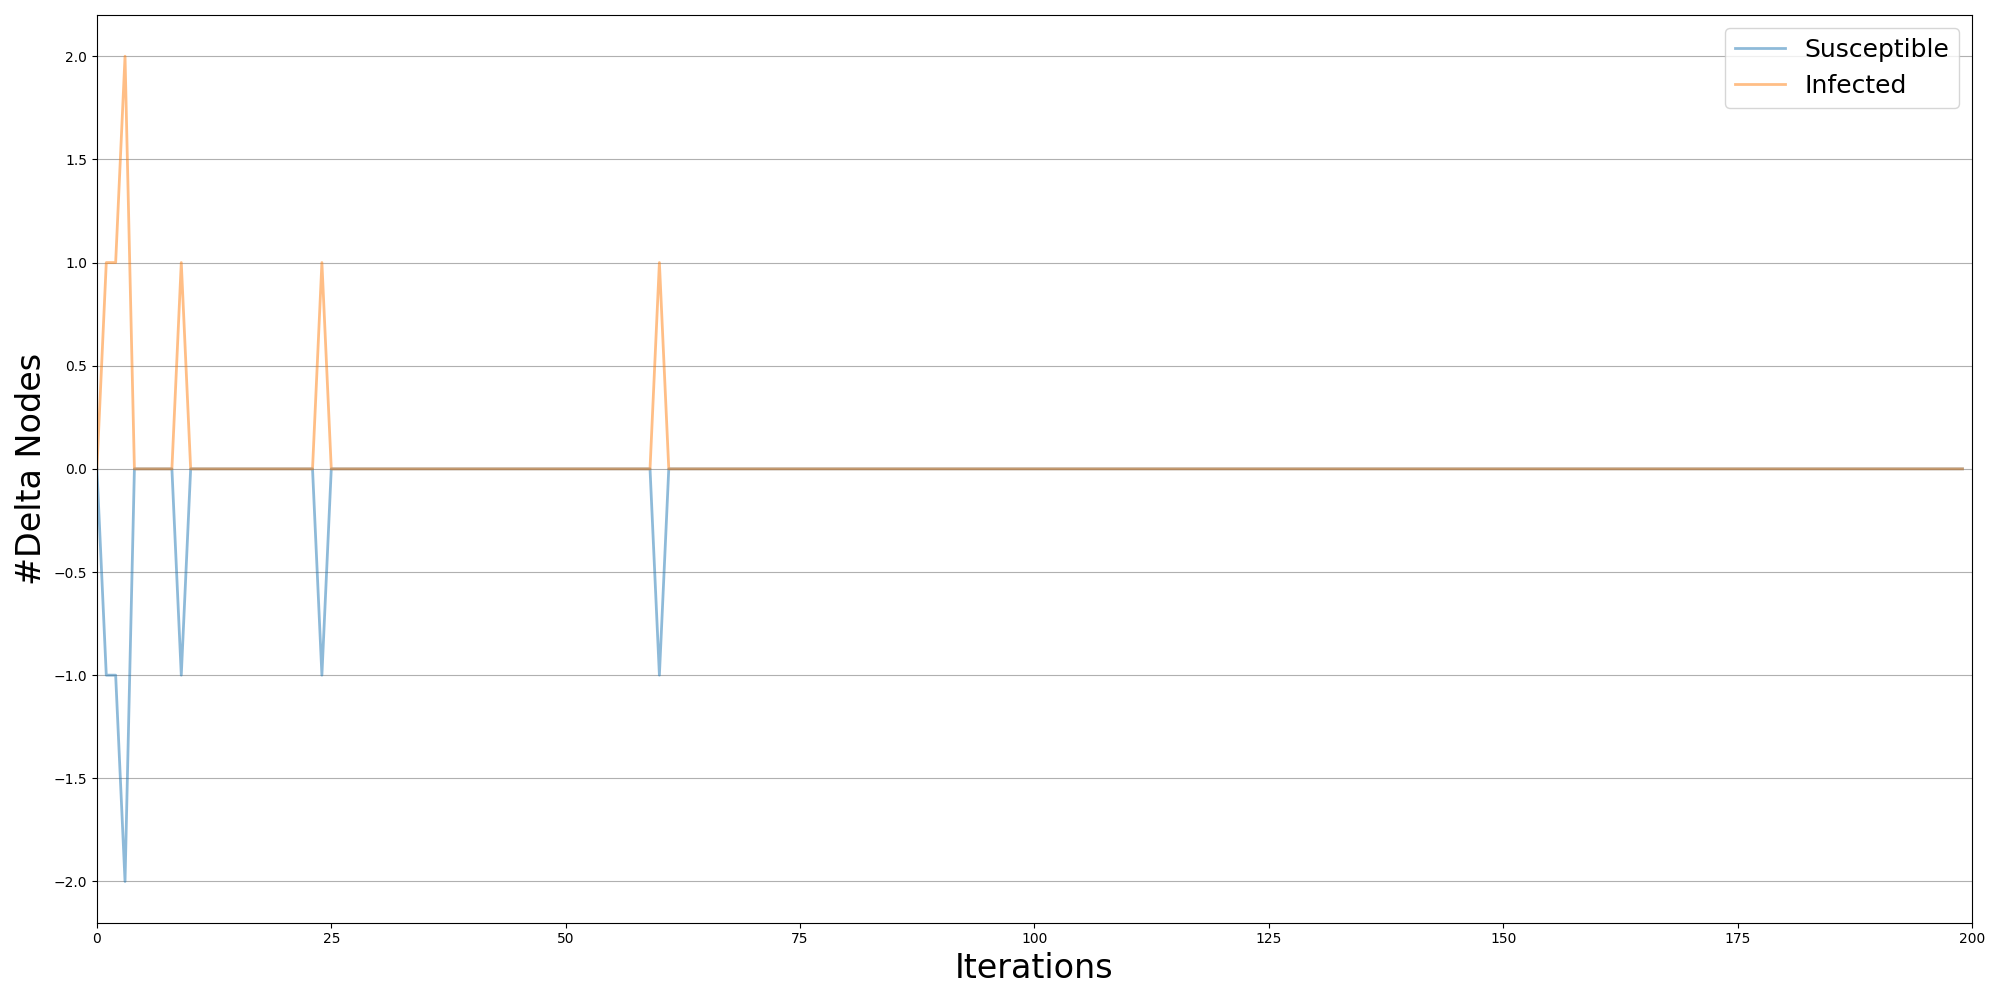

Display the prevalence with  15


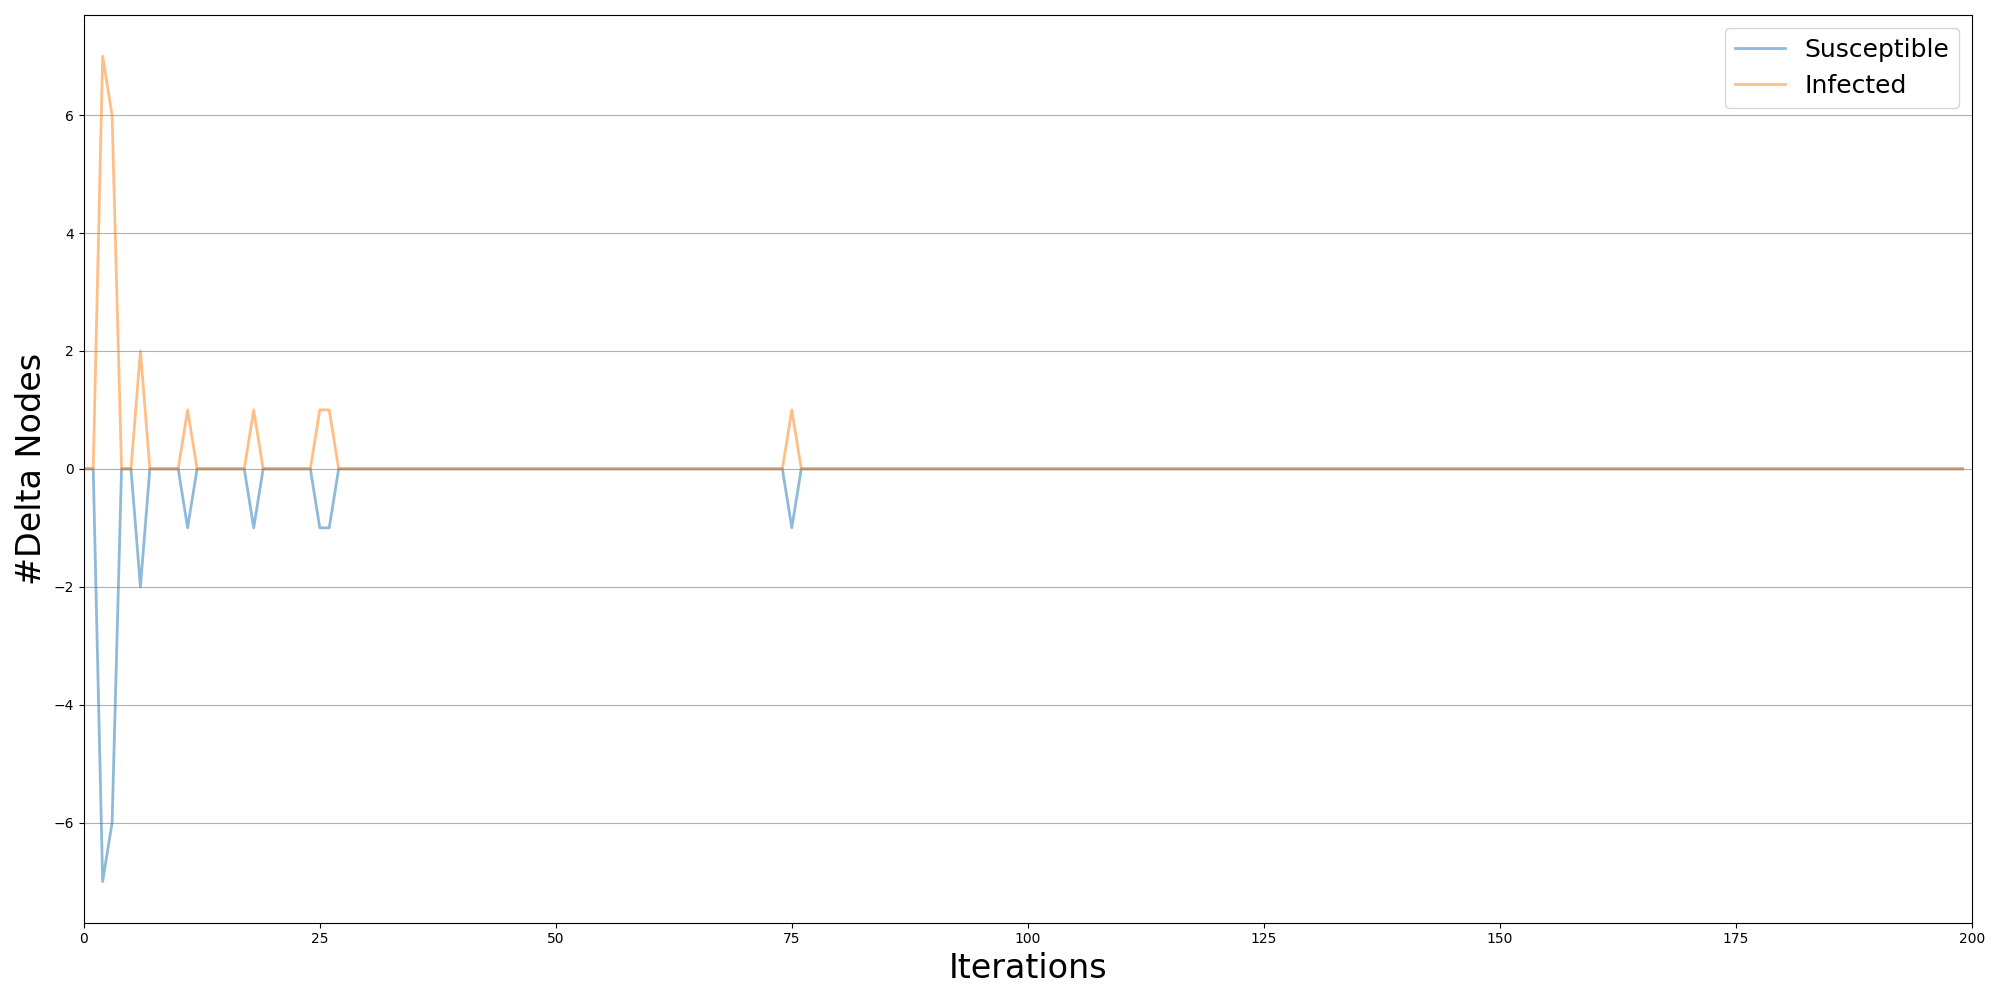

Display the prevalence with  30


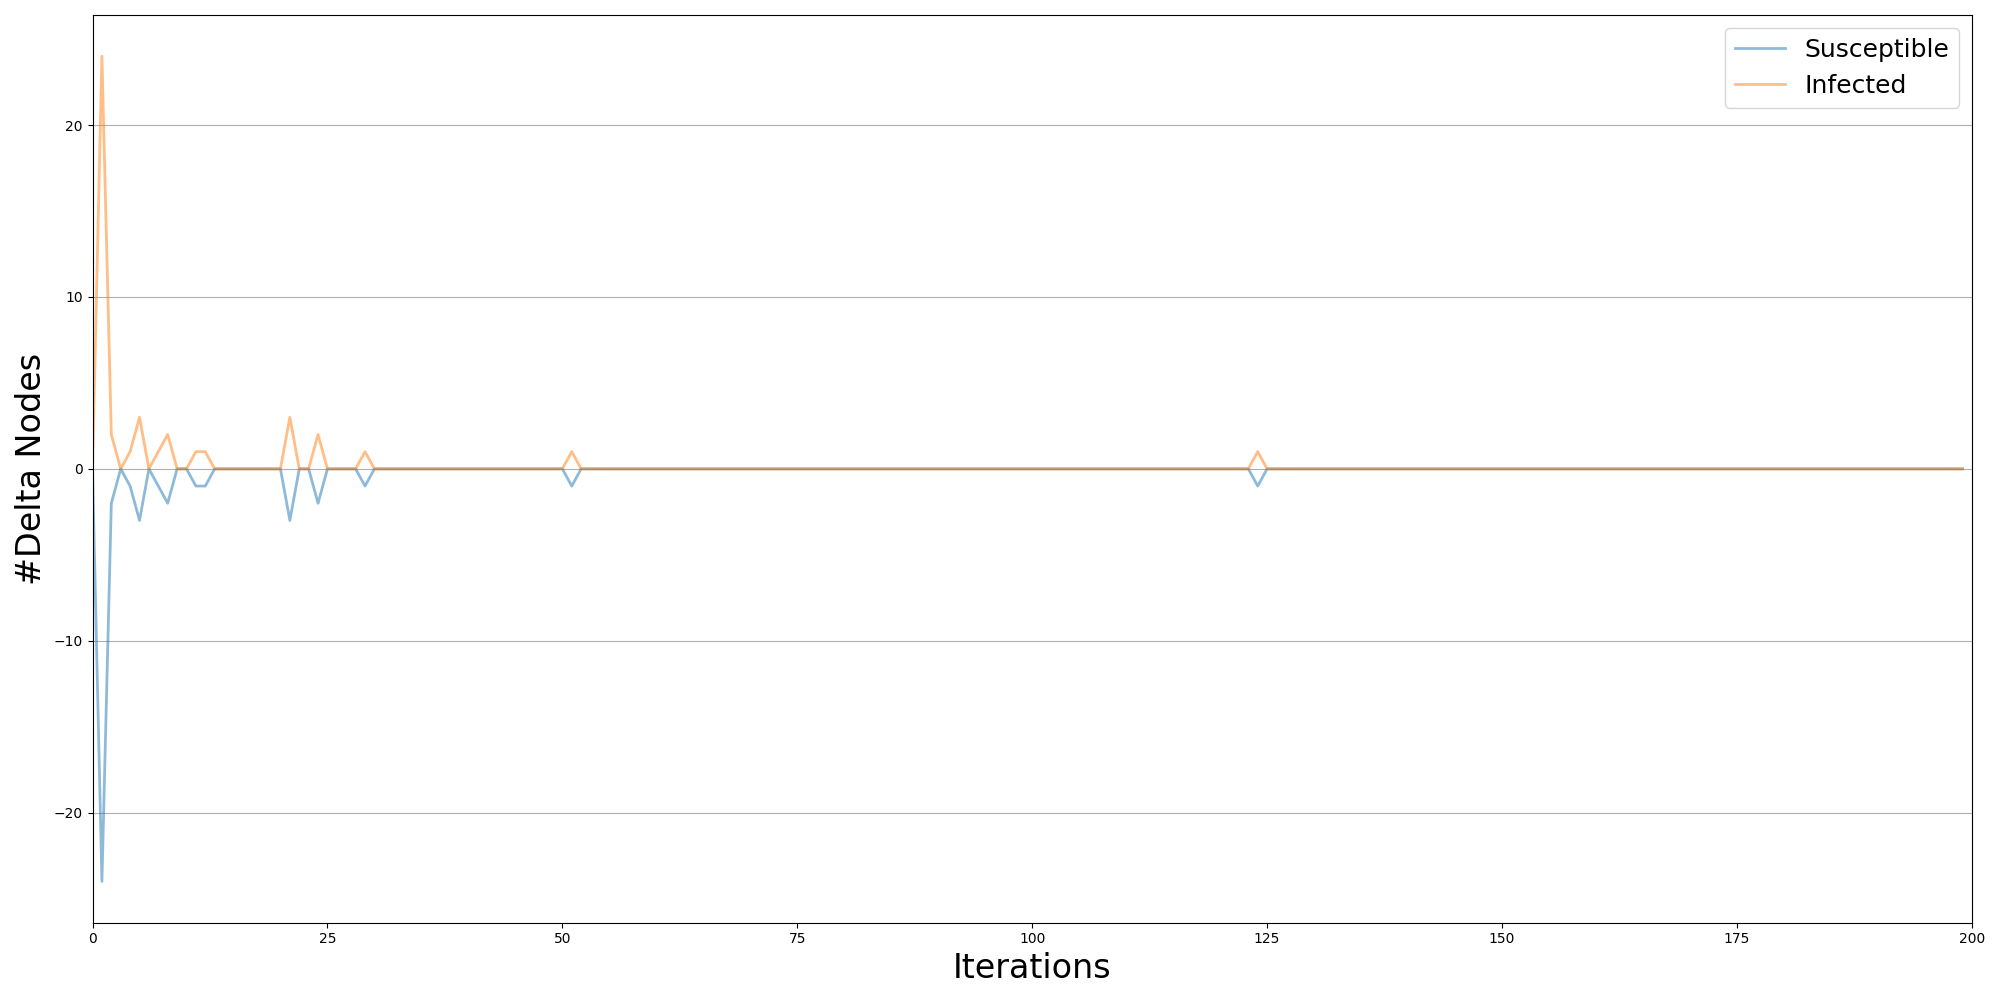

In [5]:
#(a) Sznajd model simulation
def run_sznajd_model(graph, initial_infected):
    model = op.SznajdModel(graph)
    
    # Set initial infected nodes
    cfg = mc.Configuration()
    cfg.add_model_parameter('percentage_infected', initial_infected/100)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(200)
    
    # Results
    trends = model.build_trends(iterations)
    
    # Visualization
    viz = DiffusionPrevalence(model, trends)
    viz.plot("prevalence_" + str(initial_infected) + ".png") 
    
    return trends

# Run Sznajd model for different initial infected numbers
for initial_infected in [5, 15, 30]:
    run_sznajd_model(facebook_network, initial_infected)
    print("Display the prevalence with ",initial_infected)
    display(Image(filename="prevalence_" + str(initial_infected) + ".png"))

# Close the figure to avoid the warning
plt.close()

Display the prevalence with  0.5 0.2


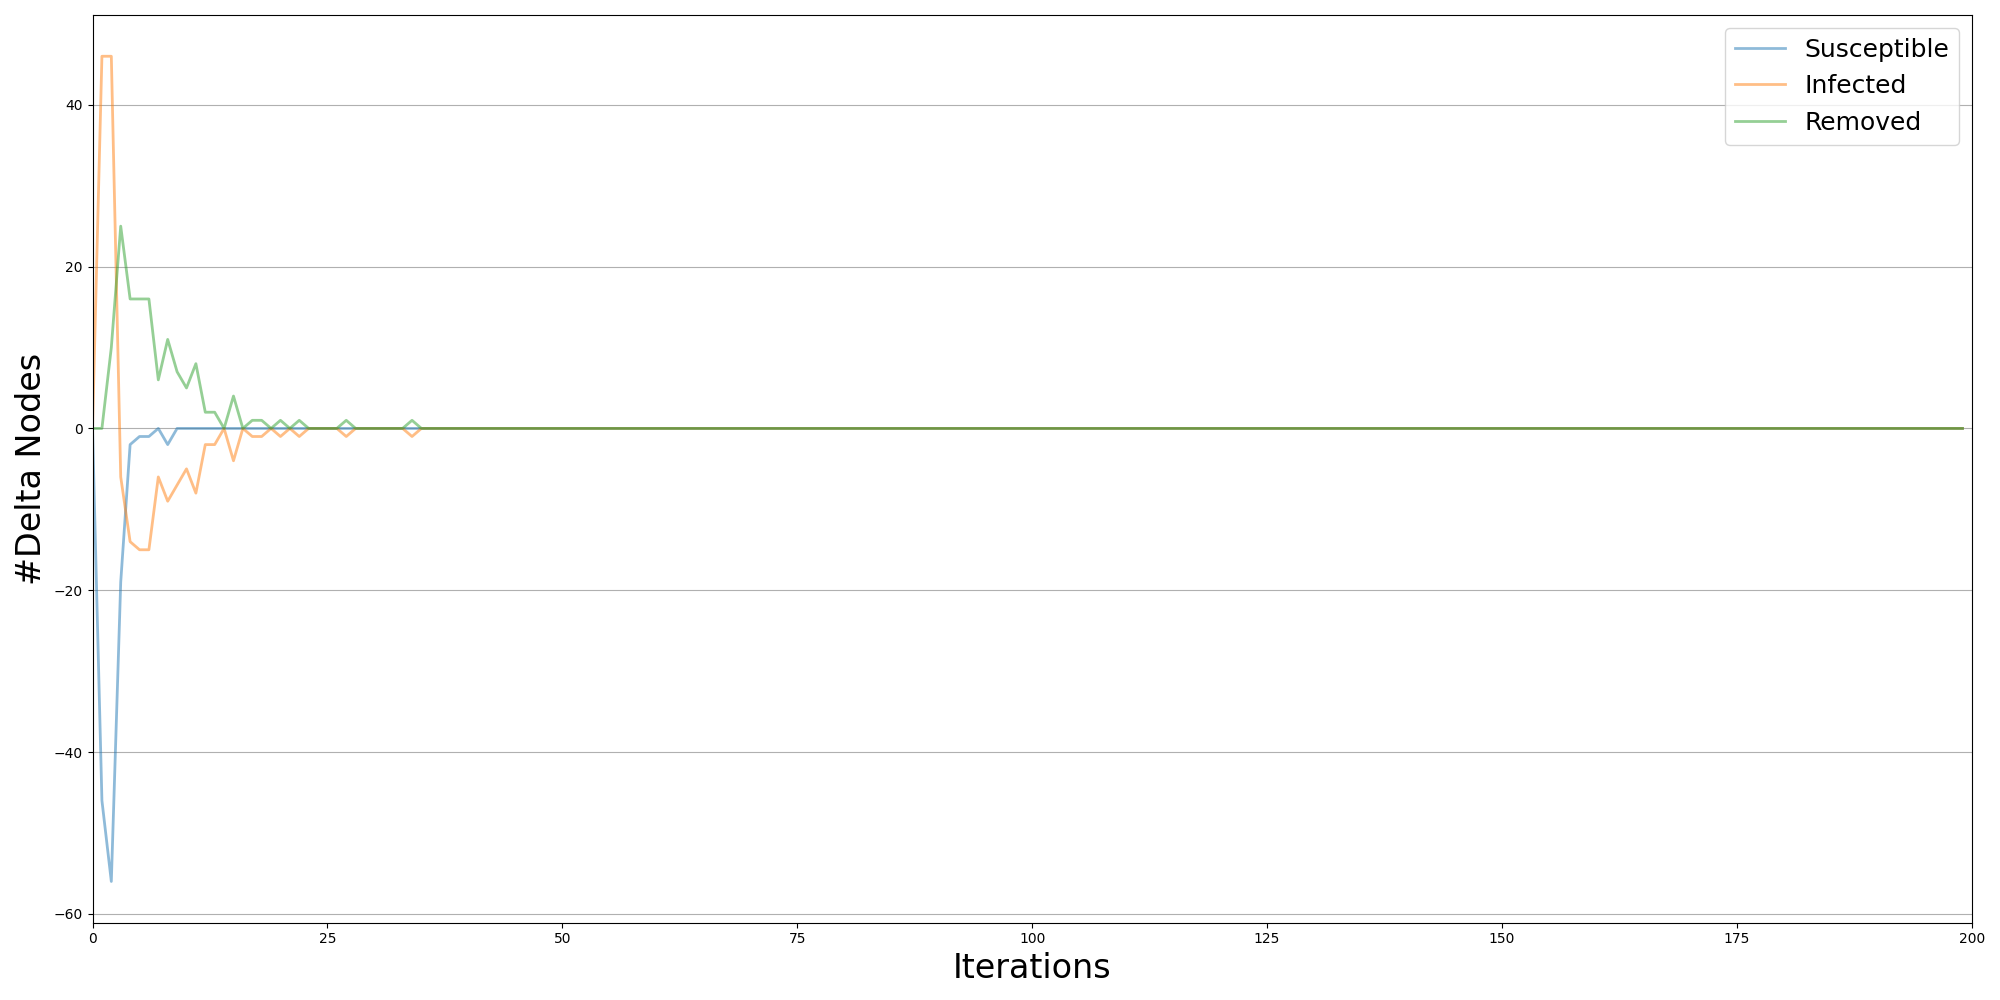

Display the prevalence with  0.3 0.3


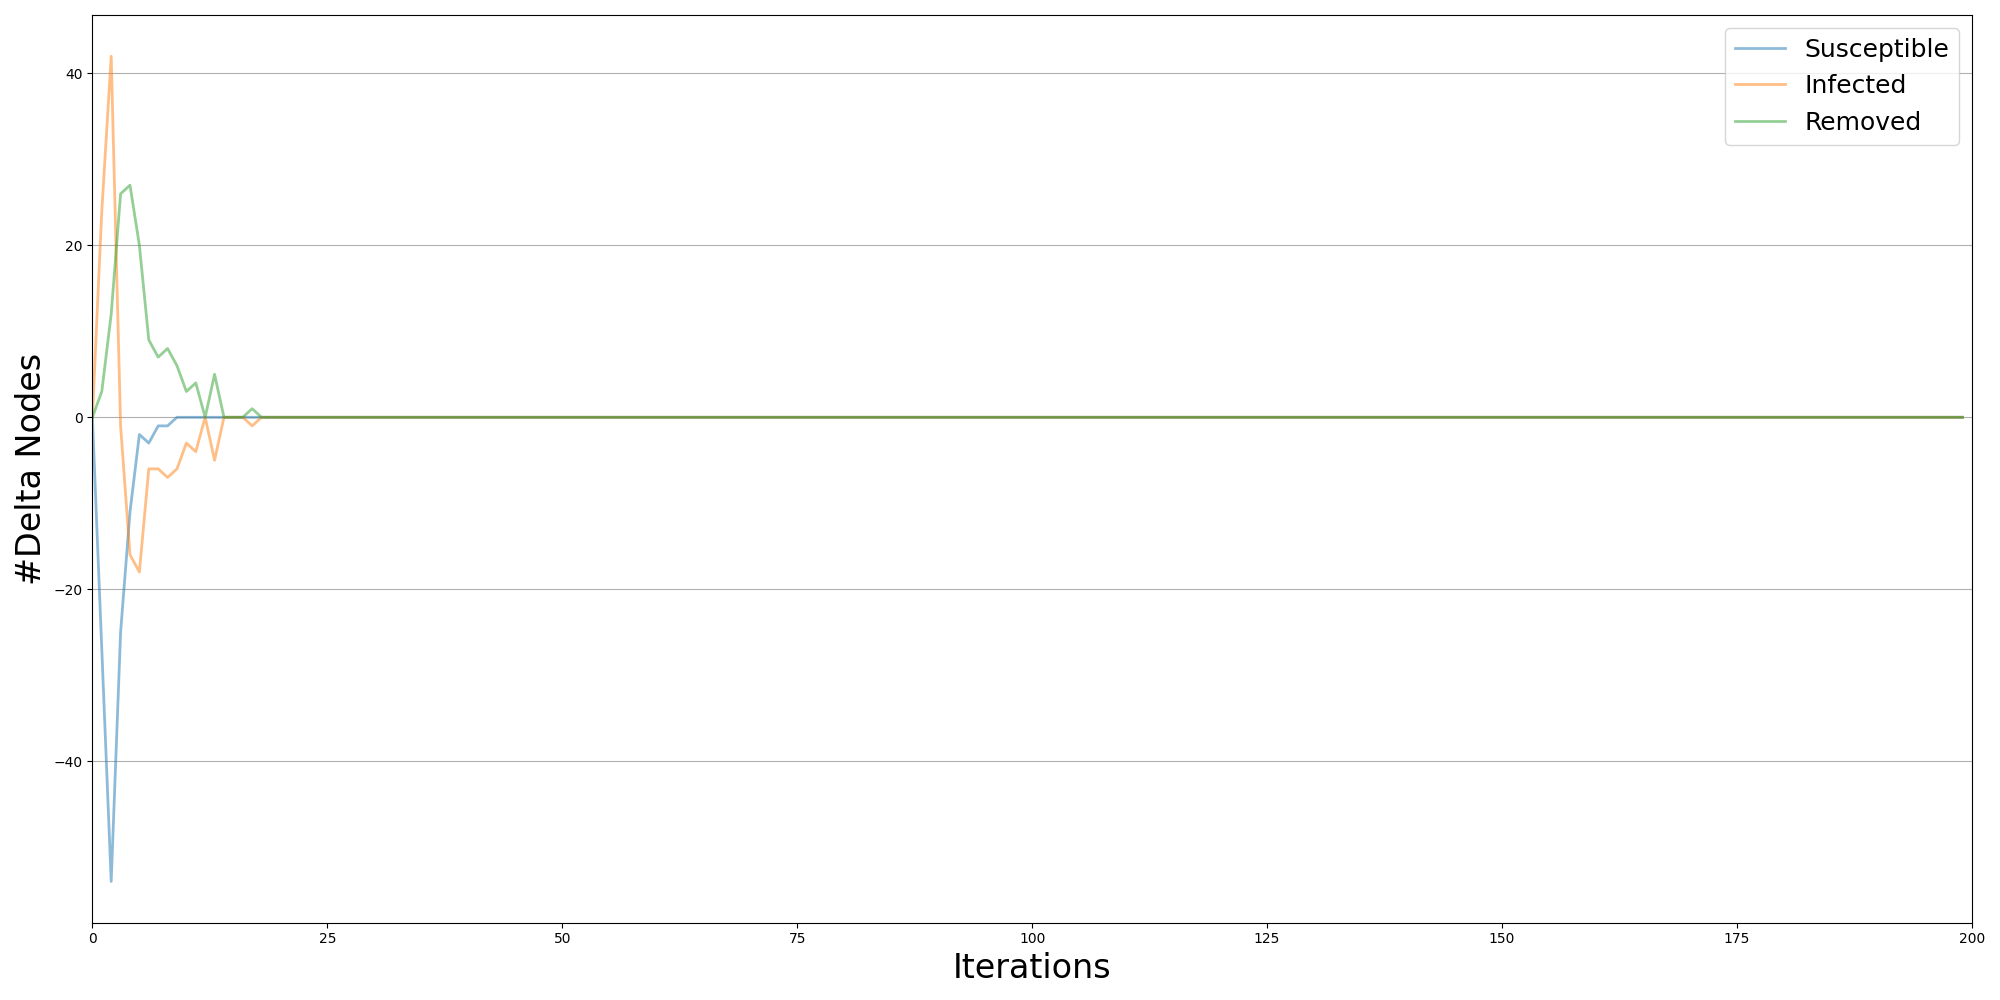

Display the prevalence with  0.4 0.5


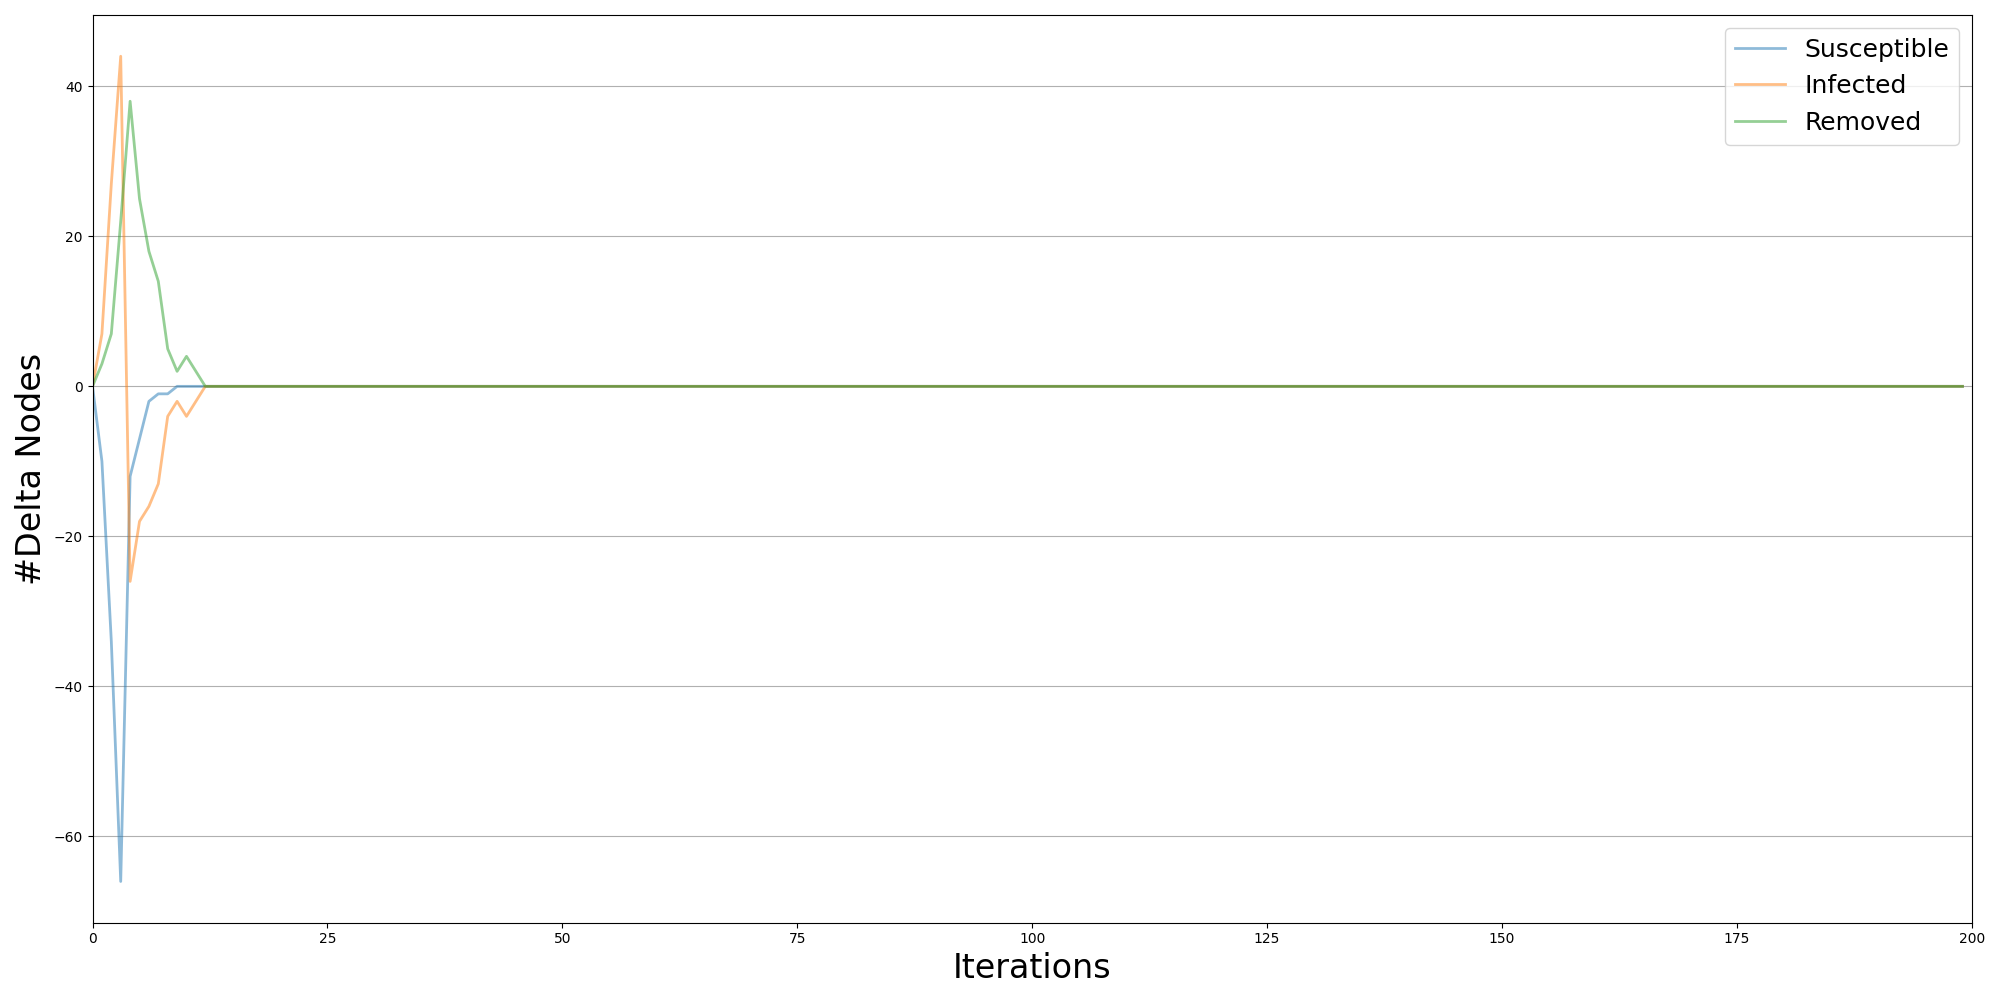

In [6]:
 
# Part (b) - SIR model for epidemic cascade
def run_sir_model(graph, infection_prob, removal_prob):
    model = ep.SIRModel(graph)
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', infection_prob)
    cfg.add_model_parameter('gamma', removal_prob)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(200)
    
    # Results
    trends = model.build_trends(iterations)
    
    # Visualization during each iteration
    viz = DiffusionPrevalence(model, trends)
    viz.plot(f"sir_prevalence_{infection_prob}_{removal_prob}.png") 


    return trends

# Run and plot SIR model for different infection/removal probabilities
for infection_prob, removal_prob in [(0.5, 0.2), (0.3, 0.3), (0.4, 0.5)]:
    run_sir_model(facebook_network, infection_prob, removal_prob)
    print("Display the prevalence with ",infection_prob,removal_prob)
    display(Image(filename="sir_prevalence_"+str(infection_prob)+"_"+str(removal_prob)+".png"))

# Close the figure to avoid the warning
plt.close()
